<a href="https://colab.research.google.com/github/tabilaocov/ady_cov.github.io/blob/master/scr/modely_RP/R_atsinanana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pynverse

  Created wheel for pynverse: filename=pynverse-0.1.4.4-cp37-none-any.whl size=6365 sha256=0bba8e689af0e9cc1152096edb7d4a215f20a9a1f68ee8edd2b12236f35db900
  Stored in directory: /root/.cache/pip/wheels/80/ab/86/ec93f37613f012ba3e65c2bbd67e5c54cbc00d237574100c24
Successfully built pynverse


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import datetime
import time
from datetime import date

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

from numpy import log,exp
from numpy.random import multinomial
from scipy.stats import uniform, gamma, gengamma, poisson, nbinom, expon
from scipy.integrate import quad


from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


from pynverse import inversefunc

tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoafaritra.csv")

#mdg_databe = pd.read_csv("/content/drive/My Drive/data/databemdg.csv")

#tilyvoa.set_index('Daty', inplace=True)

tilyvoafar = tilyvoa.groupby('Faritra')

tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)
tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)

tilyvoaanala = tilyvoafar.get_group('Analamanga')
tilyvoaanala.set_index('Daty', inplace=True)
tilyvoaanala.index = pd.to_datetime(tilyvoaanala.index)

tilyvoaatsi = tilyvoafar.get_group('Atsinanana')
tilyvoaatsi.set_index('Daty', inplace=True)
tilyvoaatsi.index = pd.to_datetime(tilyvoaatsi.index)

tilyvoaalao = tilyvoafar.get_group('Alaotra')
tilyvoaalao.set_index('Daty', inplace=True)
tilyvoaalao.index = pd.to_datetime(tilyvoaalao.index)

tilyvoamania = tilyvoafar.get_group('Mania')
tilyvoamania.set_index('Daty', inplace=True)
tilyvoamania.index = pd.to_datetime(tilyvoamania.index)

tilyvoajiro = tilyvoafar.get_group('Analanjirofo')
tilyvoajiro.set_index('Daty', inplace=True)
tilyvoajiro.index = pd.to_datetime(tilyvoajiro.index)

tilyvoanosy = tilyvoafar.get_group('Anosy')
tilyvoanosy.set_index('Daty', inplace=True)
tilyvoanosy.index = pd.to_datetime(tilyvoanosy.index)

tilyvoaandro = tilyvoafar.get_group('Androy')
tilyvoaandro.set_index('Daty', inplace=True)
tilyvoaandro.index = pd.to_datetime(tilyvoaandro.index)

tilyvoaatsim = tilyvoafar.get_group('Atsimoandrefana')
tilyvoaatsim.set_index('Daty', inplace=True)
tilyvoaatsim.index = pd.to_datetime(tilyvoaatsim.index)

tilyvoaatsitsi = tilyvoafar.get_group('AtsimoAtsinanana')
tilyvoaatsitsi.set_index('Daty', inplace=True)
tilyvoaatsitsi.index = pd.to_datetime(tilyvoaatsitsi.index)

tilyvoabe = tilyvoafar.get_group('Betsiboka')
tilyvoabe.set_index('Daty', inplace=True)
tilyvoabe.index = pd.to_datetime(tilyvoabe.index)

tilyvoaboe = tilyvoafar.get_group('Boeny')
tilyvoaboe.set_index('Daty', inplace=True)
tilyvoaboe.index = pd.to_datetime(tilyvoaboe.index)

tilyvoabon = tilyvoafar.get_group('Bongolava')
tilyvoabon.set_index('Daty', inplace=True)
tilyvoabon.index = pd.to_datetime(tilyvoabon.index)

tilyvoadia = tilyvoafar.get_group('Diana')
tilyvoadia.set_index('Daty', inplace=True)
tilyvoadia.index = pd.to_datetime(tilyvoadia.index)

tilyvoatsiatr = tilyvoafar.get_group('Matsiatra')
tilyvoatsiatr.set_index('Daty', inplace=True)
tilyvoatsiatr.index = pd.to_datetime(tilyvoatsiatr.index)

tilyvoahoro = tilyvoafar.get_group('Ihorombe')
tilyvoahoro.set_index('Daty', inplace=True)
tilyvoahoro.index = pd.to_datetime(tilyvoahoro.index)

tilyvoatasy = tilyvoafar.get_group('Itasy')
tilyvoatasy.set_index('Daty', inplace=True)
tilyvoatasy.index = pd.to_datetime(tilyvoatasy.index)

tilyvoamel = tilyvoafar.get_group('Melaky')
tilyvoamel.set_index('Daty', inplace=True)
tilyvoamel.index = pd.to_datetime(tilyvoamel.index)

tilyvoamena = tilyvoafar.get_group('Menabe')
tilyvoamena.set_index('Daty', inplace=True)
tilyvoamena.index = pd.to_datetime(tilyvoamena.index)

tilyvoasava = tilyvoafar.get_group('Sava')
tilyvoasava.set_index('Daty', inplace=True)
tilyvoasava.index = pd.to_datetime(tilyvoasava.index)

tilyvoasofi = tilyvoafar.get_group('Sofia')
tilyvoasofi.set_index('Daty', inplace=True)
tilyvoasofi.index = pd.to_datetime(tilyvoasofi.index)

tilyvoakara = tilyvoafar.get_group('Vakinakaratra')
tilyvoakara.set_index('Daty', inplace=True)
tilyvoakara.index = pd.to_datetime(tilyvoakara.index)

tilyvoavavy = tilyvoafar.get_group('Vatovavy')
tilyvoavavy.set_index('Daty', inplace=True)
tilyvoavavy.index = pd.to_datetime(tilyvoavavy.index)

path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [4]:
daty_data_manom = datetime.date(2021,4,14)
daty_data_mifar = datetime.date(2021,6,19)

datyt = daty_data_mifar

format_date = lambda date_py: '{}-{}-{}'.format(date_py.year, date_py.month, date_py.day)

formatff_date = lambda date_py: '{}/{}/{}'.format(date_py.day, date_py.month, str(date_py.year)[2:4])

formatfff_date = lambda date_py: '{}'.format(date_py.day)

In [66]:
# Voa vaovao (observed incidence)
Ivaoatsi = tilyvoaatsi['Voatomb']

dIvao = pd.DataFrame(data =Ivaoatsi)


# 0/ Discretization of the serial interval distribution

#Tombana mialoha (prior distributions)
#si_sh = 1/(0.62**2) # Report 13
#si_sc = 6.5/si_sh

si_sh = (6.48**2)/(3.83**2) # Jereo Imperial Covid-19 COVID-19 response team: Short-term forecasts
si_sc = 6.48/si_sh

def discr_si(t):
  if t == 0:
    discrsi = 0
  elif t == 1:
    discrsi = gengamma.cdf(3/2, si_sh, 1, loc = 0, scale = si_sc)
  else:
    discrsi = gengamma.cdf(t+1/2, si_sh, 1, loc = 0, scale = si_sc) - gengamma.cdf(t-1/2, si_sh, 1, loc = 0, scale = si_sc)
  return discrsi

# 1/ The total incidence over a generic window (t-k+1,t)
# Ireh(t,k) = sum(i = 0 to k-1) Ivao(t - i))

def Ireh(t,k):
  Irehv = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range((t - daty_data_manom).days + 1):
      Irehv = Irehv + dIvao['Voatomb'].loc[format_date(t - datetime.timedelta(days = i))]
  else:
    for i in range(k):
      Irehv = Irehv + dIvao['Voatomb'].loc[format_date(t - datetime.timedelta(days = i))]
  return Irehv

# 2/ Tool to compute the total infectiousness over a generic window (t-k+1,t)
# Isi(t,k) = sum(i=0 to k-1) Ivao(t - i)*discr_si(i)

# The definition of Isi(t,k) does not include the term Ivao(t) for i = 0 (because discr_si(0) =0)
# so we can start the sum from i = 1; but it includes the last term Ivao(t - k + 1)*discr_si(k - 1) for i = k-1. 

def Isi(t,k):
  Ivaosi = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range(1,(t - daty_data_manom).days + 1):
      Ivaosi = Ivaosi + dIvao['Voatomb'].loc[format_date(t - datetime.timedelta(days = i))]*discr_si(i)
  else:
    for i in range(1,k):
      Ivaosi = Ivaosi + dIvao['Voatomb'].loc[format_date(t - datetime.timedelta(days = i))]*discr_si(i)
  return Ivaosi

# The total infectiousness before t

# lsi(t) := sum(i=0 to t-1) Ivao(t - i)*discr_si(i)

def lsi(t):
  return Isi(t, (t - daty_data_manom).days +1)

  # for checking, take for example t = daty_data_manom + datetime.timedelta(days = 3)

# 3/ The sum of total infectiousness before t over a generic window (t-k+1,t)
# tlsi(t) := sum(i=t-k+1 to t)lsi(i)

def tlsi(t,k):
  tlsi = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range((t - daty_data_manom).days + 1):
      tlsi = tlsi + lsi(t - datetime.timedelta(days = i))
  else:
    for i in range(k):
      tlsi = tlsi + lsi(t - datetime.timedelta(days = i))
  return tlsi

# 4/ The shape parameters of the posterior predictive negative binomial of I(t+1)
# pnb(t,k) = lsi(t+1)*Gamma_post_scale(R(t,k))/(1 + lsi(t+1)*Gamma_post_scale(R(t,k)))

def pnb(t,k):
  return lsi(t+datetime.timedelta(days = 1))/(1/si_sc + tlsi(t,k) + lsi(t+datetime.timedelta(days = 1)))

# pnb(t,k) dia ny taha herjika hoan'ny NB hoan'ny I(t+1).

# 5/ Use the pmf of the posterior predictive negative binomial to compute
# each additive contribution at time s then for-loop for s in the time interval

def lpr(t,k):
  return -np.log(nbinom.pmf(dIvao['Voatomb'].loc[format_date(t + datetime.timedelta(days = 1))], si_sh + Ireh(t,k), pnb(t,k)))


# Fifidianana ireo taha mialoha (prior parameters)

In [6]:
  #shape
kk=2
def func_sh(t):
    def Rtpsand_sh(a):
      return a + Ireh(t,kk)
    return Rtpsand_sh
  # Scale
def func_sc(t):
    def Rtpsand_sc(b):
      return 1/(1/b + tlsi(t,kk))
    return Rtpsand_sc

def funcsh_inv(t):
    def sh_invex(x):
      return (x + Ireh(t,kk))/x
    return inversefunc(sh_invex, domain=[0.01, 1e+11])


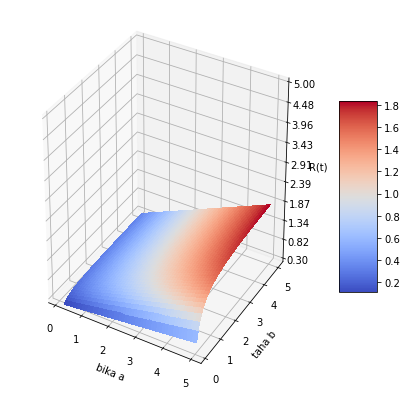

In [7]:
# Variation of R(datyab) with rapport to the prior parameters

datyab = daty_data_mifar

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(0.1,5,100)
Y = np.linspace(0.1,5,100)
X, Y = np.meshgrid(X, Y)
Z = func_sh(datyab)(X)*func_sc(datyab)(Y)
W = X*Y
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#surf = ax.plot_surface(X, Y, W, cmap=cm.coolwarm,
 #                      linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.3, 5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set(xlabel ='bika a', ylabel = "taha b", zlabel = 'R(t)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.savefig(path_to_save+'Rt168_anala.eps')

plt.show()

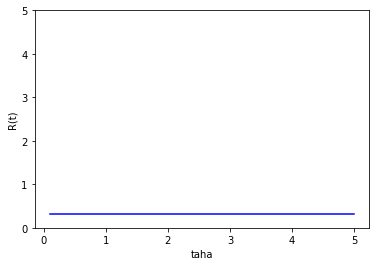

taha* = 1
R(t= 2021-06-19 ) = 0.32630781495532296 = bika*


In [8]:
# R(t) when equality between the prior and the posterior

# 100 linearly spaced numbers
x = np.linspace(0.1,5,100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x, x*funcsh_inv(datyab)(x/func_sc(datyab)(x)), 'blue')

ax.set_ylim(0,5)
ax.set(xlabel ='taha', ylabel = "R(t)")


# show the plot
plt.show()

print('taha* = 1')
print('R(t=',datyab,') =', funcsh_inv(datyab)(1/func_sc(datyab)(1)), '= bika*')


# Fanombanana ny R(t) (estimation of Rt)

In [11]:
# Prior Gamma distribution of Rt

Rtpr_sh = 0.32 # shape
Rtpr_sc = 1 # scale

# Posterior distribution for Rt

# Shape parameter :
def Rtps_sh(t):
   return Rtpr_sh + Ireh(t,kk)

# Scale
def Rtps_sc(t):
  return 1/(1/Rtpr_sc + tlsi(t,kk))

# mean
def Rt_salan(t):
  return Rtps_sh(t)*Rtps_sc(t)

# 75th and 25th percentiles

def perc75(t):
  return gengamma.ppf(0.75, Rtps_sh(t), 1, loc = 0, scale = Rtps_sc(t))

def perc25(t):
  return gengamma.ppf(0.25, Rtps_sh(t), 1, loc = 0, scale = Rtps_sc(t))


def Rtps_sal(t):
  return dIvao['Voatomb'].loc[format_date(t)]/lsi(t)

daty_oh1 = datetime.date(2021,5,1)

print("Kajy mivantana ny R hoan'ny", daty_data_mifar, ':', Rtps_sal(daty_data_mifar))

print("Salan'isa R hoan'ny", daty_oh1, ':', Rt_salan(daty_oh1))
print("Kartily @ 75% R hoan'ny", daty_oh1, ':', perc75(daty_oh1))
print("Kartily @ 25% R hoan'ny", daty_oh1, ':', perc25(daty_oh1))

print('R(',formatff_date(daty_data_mifar),')', ' = ', np.round(Rt_salan(daty_data_mifar),5), ' (75%-kartily: ', np.round(perc75(daty_data_mifar),5), ' ; 25%-kartily: ', np.round(perc25(daty_data_mifar),5),')', sep = '' )

Kajy mivantana ny R hoan'ny 2021-06-19 : 0.68472117231629
Salan'isa R hoan'ny 2021-05-01 : 0.5560222803108147
Kartily @ 75% R hoan'ny 2021-05-01 : 0.6851175929596408
Kartily @ 25% R hoan'ny 2021-05-01 : 0.39539829655972675
R(19/6/21) = 0.32476 (75%-kartily: 0.44728 ; 25%-kartily: 0.11959)


In [12]:
rt_atsi_lst = []

daty_oh2 = daty_data_mifar
for i in range(10):
  t = daty_oh2 - datetime.timedelta(days = i)
  rt_amboar = Rt_salan(t)
  rt_atsi_lst.append((t,Rt_salan(t)))

rt_atsi_lst

[(datetime.date(2021, 6, 19), 0.32475592204273707),
 (datetime.date(2021, 6, 18), 0.9729123225051756),
 (datetime.date(2021, 6, 17), 0.8419967375319402),
 (datetime.date(2021, 6, 16), 0.21489707933338978),
 (datetime.date(2021, 6, 15), 0.1792907153615665),
 (datetime.date(2021, 6, 14), 0.03661006506777814),
 (datetime.date(2021, 6, 13), 0.031468393471217916),
 (datetime.date(2021, 6, 12), 0.11407244443873925),
 (datetime.date(2021, 6, 11), 0.33518567380063846),
 (datetime.date(2021, 6, 10), 0.23725421196726748)]

In [13]:
# Plotting 

np.random.seed(12345)

daty_data_mifar9 = daty_data_mifar - datetime.timedelta(days = 9)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_lst = []

data_Rt_lst = []

for i in range(round(((daty_data_mifar - daty_data_mifar9).days)+1)):
  t = daty_data_mifar9 + datetime.timedelta(days = i)
  data_amboar = [gengamma.rvs( func_sh(t)(Rt_salan(t)), 1, loc = 0, scale = func_sc(t)(1)) for j in range(1000)]
  daty_lst.append(formatf_date(t))
  data_Rt_lst.append(data_amboar)


In [14]:
Rtdata = pd.DataFrame(columns =['daty10','rt10'])
for i in range(10):
    Rtdata.loc[i] = [daty_lst[i],data_Rt_lst[i]]

Rtdata = Rtdata.explode('rt10')
Rtdata['rt10'] = Rtdata['rt10'].astype('float')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


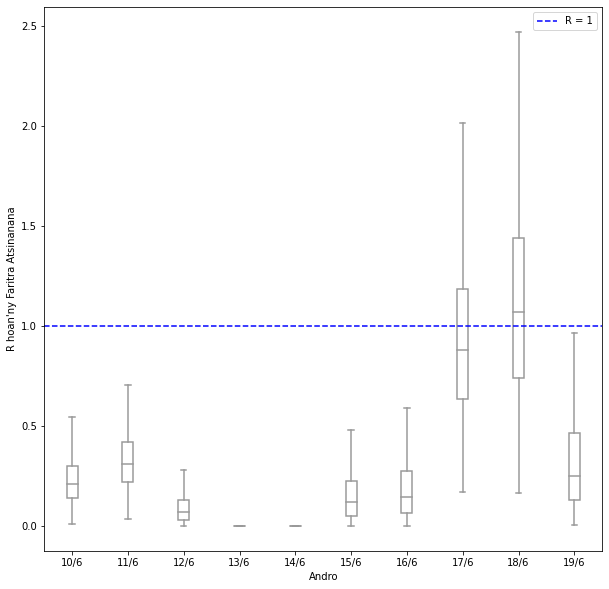

In [15]:
# Plotting the last 10 days

fig, ax = plt.subplots(figsize=(10, 10))


sns.boxplot(x = "daty10", y = "rt10", data = Rtdata, color='white', width=0.2, showfliers=False, ax=ax)
ax.axhline(y=1, color='b', linestyle='dashed', label ="R = 1")

ax.set(xlabel ='Andro', ylabel = "R hoan'ny Faritra Atsinanana")
ax.legend(loc= 'best')

plt.savefig(path_to_save+'Rt1962110_atsi.png')
plt.savefig(path_to_save+'Rt1962110_atsi.eps')
plt.show()

# Jeritodika ny herinandro

In [16]:
daty_ambaj = datetime.date(2021,6,14)
daty_amboj = datetime.date(2021,6,18)

daty_data_mifarj = datetime.date(2021,6,12)

In [17]:
daty_oh1 = daty_ambaj

print('Tombana ambany: R(',formatff_date(daty_oh1),')', ' = \\textbf{', np.round(Rt_salan(daty_oh1),5), '} (75\%-kartily: ', np.round(perc75(daty_oh1),5), ' ; 25\%-kartily: ', np.round(perc25(daty_oh1),5),") raisina hoan'ny ",formatfff_date(daty_data_mifarj + datetime.timedelta(days = 1)),'-',formatff_date(daty_data_mifar), sep = '')

daty_oh2 = daty_amboj

print('Tombana ambony: R(',formatff_date(daty_oh2),')', ' = \\textbf{', np.round(Rt_salan(daty_oh2),5), '} (75\%-kartily: ', np.round(perc75(daty_oh2),5), ' ; 25\%-kartily: ', np.round(perc25(daty_oh2),5),") raisina hoan'ny ",formatfff_date(daty_data_mifarj + datetime.timedelta(days = 1)),'-',formatff_date(daty_data_mifar), sep = '' )

Tombana ambany: R(14/6/21) = \textbf{0.03661} (75\%-kartily: 0.04298 ; 25\%-kartily: 0.00107) raisina hoan'ny 13-19/6/21
Tombana ambony: R(18/6/21) = \textbf{0.97291} (75\%-kartily: 1.23515 ; 25\%-kartily: 0.63052) raisina hoan'ny 13-19/6/21


### Ambany

In [18]:
# Computing Ivao(daty_mifarj + i) for i in range(1,8)

daty_m1j = daty_data_mifarj + datetime.timedelta(days = 1)

#Rt_amba_hitsiny = (Rt_salan(datetime.date(2020,7,20))- Rt_salan(daty_ambaj))/2

Rt_amba_hitsiny = 0
Rt_vibaj = Rt_salan(daty_ambaj) + Rt_amba_hitsiny

Iv = int(Rt_vibaj*lsi(daty_m1j))

dIvao.loc[pd.to_datetime(daty_m1j)] =[Iv]

for i in range(1,8):
 tj = daty_m1j + datetime.timedelta(days = i)
 Ivv = int(Rt_vibaj*lsi(tj))
 dIvao.loc[pd.to_datetime(tj)] = [Ivv]

In [ ]:
Rt_vibaj

0.37722763573727447

In [19]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_j_lst = []

data_baj = []


for i in range(1,8):
  t = daty_data_mifarj + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_j_lst.append(daty)
  data_baj.append(data_amboar)


###Ambony

In [21]:
# Computing Ivao(daty_mifarj + i) for i in range(1,8)

daty_m1j = daty_data_mifarj + datetime.timedelta(days = 1)

#Rt_ambo_hitsiny = (Rt_salan(datetime.date(2020,7,22))- Rt_salan(daty_amboj))/2

Rt_ambo_hitsiny = 0

Rt_viboj = Rt_salan(daty_amboj) + Rt_ambo_hitsiny

Iv = int(Rt_viboj*lsi(daty_m1j))

dIvao.loc[pd.to_datetime(daty_m1j)] =[Iv]

for i in range(1,8):
 tj = daty_m1j + datetime.timedelta(days = i)
 Ivv = int(Rt_viboj*lsi(tj))
 dIvao.loc[pd.to_datetime(tj)] = [Ivv]

In [ ]:
Rt_viboj

0.7675999899873198

In [22]:
# Sampling 

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_j_lst = []

data_boj = []


for i in range(1,8):
  t = daty_data_mifarj + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_j_lst.append(daty)
  data_boj.append(data_amboar)


In [23]:
Rtdataj = pd.DataFrame(columns =['datyj','rtbaj','rtboj'])
for i in range(7):
    Rtdataj.loc[i] = [daty_j_lst[i],data_baj[i], data_boj[i]]

Rtdataj = Rtdataj.explode('rtbaj')
Rtdataj = Rtdataj.explode('rtboj')
Rtdataj['rtbaj'] = Rtdataj['rtbaj'].astype('float')
Rtdataj['rtboj'] = Rtdataj['rtboj'].astype('float')

### Sary

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


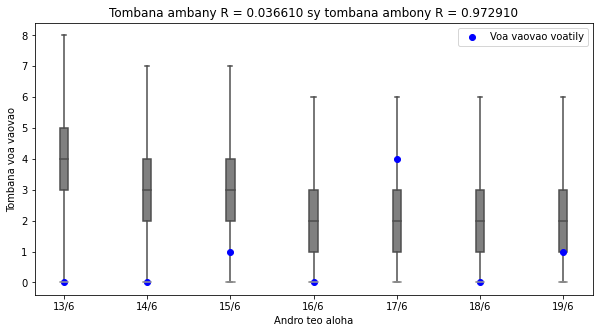

In [25]:
# Plotting the evaluation of the last 7 days

fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x = "datyj", y = 'rtbaj', data = Rtdataj, color='white', width=0.1, showfliers=False, ax=ax)
box = sns.boxplot(x = "datyj", y = 'rtboj', data = Rtdataj, color='grey', width=0.1, showfliers=False, ax=ax)
ax.plot(daty_j_lst, dIvao.loc[pd.to_datetime(daty_m1j):pd.to_datetime(daty_m1j + datetime.timedelta(days = 6))], marker ="o",ls = 'None', color='blue',label="Voa vaovao voatily")
ax.set(xlabel = 'Andro teo aloha', ylabel="Tombana voa vaovao", title = 'Tombana ambany R = %f sy tombana ambony R = %f' % (np.round(Rt_vibaj,5),np.round(Rt_viboj,5)))


plt.legend(loc= 'upper right')

plt.savefig(path_to_save+'Iv13621j_atsi.eps')
plt.savefig(path_to_save+'Iv13621j_atsi.png')

plt.show()

# Ny 7 andro manaraka

In [26]:
# Choice of R(t) for the forecasting

# Dates for which R(t) is minimum and maximum during the last 10 days

daty_amba = daty_ambaj
daty_ambo = daty_amboj

### Vinavina ambany

In [27]:
# Computing Ivao(daty_mifar + i) for i in range(1,8)

daty_m1 = daty_data_mifar + datetime.timedelta(days = 1)

Iv = int(Rt_salan(daty_amba)*lsi(daty_m1))

dIvao.loc[pd.to_datetime(daty_m1)] =[Iv]

for i in range(1,8):
 errt = daty_m1 + datetime.timedelta(days = i)
 Ivv = int(Rt_salan(daty_amba)*lsi(errt))
 dIvao.loc[pd.to_datetime(errt)] =[Ivv]


In [28]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_hoav_lst = []

data_amba_hoav = []

Ivv_dat = []

for i in range(1,8):
  t = daty_data_mifar + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_hoav_lst.append(daty)
  data_amba_hoav.append(data_amboar)

In [29]:
print('Vinavina ambany')

daty_oh = daty_data_mifar + datetime.timedelta(days = 2)

print("notombanana avy amin'ny R(", formatff_date(daty_amba), ') = ', np.round(Rt_salan(daty_amba),5), ". \\\\", sep = '') 


print('Ohatra, R(', formatff_date(daty_oh),') = ', np.round(Rt_salan(daty_oh),5), ". Isan'ny voa vaovao @ ", formatff_date(daty_oh), ' = ',  int(dIvao['Voatomb'].loc[format_date(daty_oh)]), ' (75\%-kartily: ', int(poisson.ppf(0.75, dIvao['Voatomb'].loc[format_date(daty_oh)])), ' ; 25\%-kartily: ', int(poisson.ppf(0.25, dIvao['Voatomb'].loc[format_date(daty_oh)])), ')', sep = '')

Vinavina ambany
notombanana avy amin'ny R(14/6/21) = 0.03661. \\
Ohatra, R(21/6/21) = 0.08902. Isan'ny voa vaovao @ 21/6/21 = 0 (75\%-kartily: 0 ; 25\%-kartily: 0)


### Vinavina ambony

In [31]:
# Computing Ivao(daty_mifar + i) for i in range(1,8)

daty_m1 = daty_data_mifar + datetime.timedelta(days = 1)

Iv = int(Rt_salan(daty_ambo)*lsi(daty_m1))

dIvao.loc[pd.to_datetime(daty_m1)] =[Iv]

for i in range(1,8):
 errt = daty_m1 + datetime.timedelta(days = i)
 Ivv = int(Rt_salan(daty_ambo)*lsi(errt))
 dIvao.loc[pd.to_datetime(errt)] =[Ivv]


In [32]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_hoav_lst = []

data_ambo_hoav = []

Ivv_dat = []

for i in range(1,8):
  t = daty_data_mifar + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_hoav_lst.append(daty)
  data_ambo_hoav.append(data_amboar)

In [33]:
print('Vinavina ambony')

daty_oh = daty_data_mifar + datetime.timedelta(days = 2)

print("notombanana avy amin'ny R(", formatff_date(daty_ambo), ') = ', np.round(Rt_salan(daty_ambo),5), ". \\\\", sep = '') 

print('Ohatra, R(', formatff_date(daty_oh),') = ', np.round(Rt_salan(daty_oh),5), ". Isan'ny voa vaovao @ ", formatff_date(daty_oh), ' = \\textbf{',  int(dIvao['Voatomb'].loc[format_date(daty_oh)]), '} (75\%-kartily: \\textbf{', int(poisson.ppf(0.75, dIvao['Voatomb'].loc[format_date(daty_oh)])), '} ; 25\%-kartily: \\textbf{', int(poisson.ppf(0.25, dIvao['Voatomb'].loc[format_date(daty_oh)])), '})', sep = '')

Vinavina ambony
notombanana avy amin'ny R(18/6/21) = 0.97291. \\
Ohatra, R(21/6/21) = 0.63869. Isan'ny voa vaovao @ 21/6/21 = \textbf{1} (75\%-kartily: \textbf{2} ; 25\%-kartily: \textbf{0})


In [34]:
Rtdatah = pd.DataFrame(columns =['datyh','rtbah','rtboh'])
for i in range(7):
    Rtdatah.loc[i] = [daty_hoav_lst[i],data_amba_hoav[i], data_ambo_hoav[i]]

Rtdatah = Rtdatah.explode('rtbah')
Rtdatah = Rtdatah.explode('rtboh')
Rtdatah['rtbah'] = Rtdatah['rtbah'].astype('float')
Rtdatah['rtboh'] = Rtdatah['rtboh'].astype('float')

### Sary

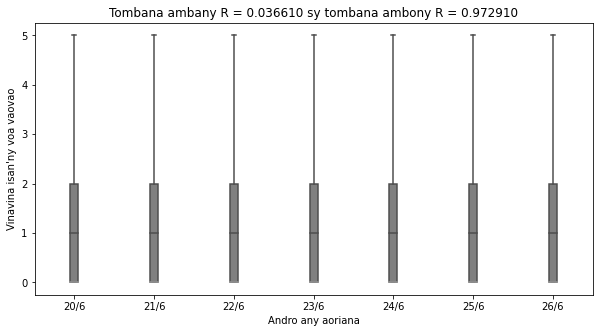

In [35]:
# Plotting boundaries for the next 7 days

fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x = 'datyh', y = 'rtbah', data = Rtdatah, color='white', width=0.1, showfliers=False, ax=ax)
box = sns.boxplot(x = 'datyh', y = 'rtboh', data = Rtdatah, color='grey', width=0.1, showfliers=False, ax=ax)

ax.set_title('Tombana ambany R = %f sy tombana ambony R = %f' % (np.round(Rt_salan(daty_amba),5),np.round(Rt_salan(daty_ambo),5)))
ax.set_xlabel('Andro any aoriana')
ax.set_ylabel("Vinavina isan'ny voa vaovao")

plt.savefig(path_to_save+'Iv19621hoav_atsi.eps')
plt.savefig(path_to_save+'Iv19621hoav_atsi.png')

plt.show()

## Miainga @ salan'isa 7 andro mifanarakaraka

In [37]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  sitr = 0
  for j in range(7):
    sitr = sitr + tilyvoaatsi.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaatsi.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(sitr/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [65]:
# Voa vaovao (observed incidence)
Ivaoatsi = tilyvoaatsi['Voatomb_7']

dIvao = pd.DataFrame(data =Ivaoatsi)



# 0/ Discretization of the serial interval distribution

#Tombana mialoha (prior distributions)
#si_sh = 1/(0.62**2) # Report 13
#si_sc = 6.5/si_sh

si_sh = (6.48**2)/(3.83**2) # Jereo Imperial Covid-19 COVID-19 response team: Short-term forecasts
si_sc = 6.48/si_sh

def discr_si(t):
  if t == 0:
    discrsi = 0
  elif t == 1:
    discrsi = gengamma.cdf(3/2, si_sh, 1, loc = 0, scale = si_sc)
  else:
    discrsi = gengamma.cdf(t+1/2, si_sh, 1, loc = 0, scale = si_sc) - gengamma.cdf(t-1/2, si_sh, 1, loc = 0, scale = si_sc)
  return discrsi

# 1/ The total incidence over a generic window (t-k+1,t)
# Ireh(t,k) = sum(i = 0 to k-1) Ivao(t - i))

def Ireh(t,k):
  Irehv = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range((t - daty_data_manom).days + 1):
      Irehv = Irehv + dIvao['Voatomb_7'].loc[format_date(t - datetime.timedelta(days = i))]
  else:
    for i in range(k):
      Irehv = Irehv + dIvao['Voatomb_7'].loc[format_date(t - datetime.timedelta(days = i))]
  return Irehv

# 2/ Tool to compute the total infectiousness over a generic window (t-k+1,t)
# Isi(t,k) = sum(i=0 to k-1) Ivao(t - i)*discr_si(i)

# The definition of Isi(t,k) does not include the term Ivao(t) for i = 0 (because discr_si(0) =0)
# so we can start the sum from i = 1; but it includes the last term Ivao(t - k + 1)*discr_si(k - 1) for i = k-1. 

def Isi(t,k):
  Ivaosi = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range(1,(t - daty_data_manom).days + 1):
      Ivaosi = Ivaosi + dIvao['Voatomb_7'].loc[format_date(t - datetime.timedelta(days = i))]*discr_si(i)
  else:
    for i in range(1,k):
      Ivaosi = Ivaosi + dIvao['Voatomb_7'].loc[format_date(t - datetime.timedelta(days = i))]*discr_si(i)
  return Ivaosi

# The total infectiousness before t

# lsi(t) := sum(i=0 to t-1) Ivao(t - i)*discr_si(i)

def lsi(t):
  return Isi(t, (t - daty_data_manom).days +1)

  # for checking, take for example t = daty_data_manom + datetime.timedelta(days = 3)

# 3/ The sum of total infectiousness before t over a generic window (t-k+1,t)
# tlsi(t) := sum(i=t-k+1 to t)lsi(i)

def tlsi(t,k):
  tlsi = 0
  if k - 1 > (t - daty_data_manom).days:
    for i in range((t - daty_data_manom).days + 1):
      tlsi = tlsi + lsi(t - datetime.timedelta(days = i))
  else:
    for i in range(k):
      tlsi = tlsi + lsi(t - datetime.timedelta(days = i))
  return tlsi

# 4/ The shape parameters of the posterior predictive negative binomial of I(t+1)
# pnb(t,k) = lsi(t+1)*Gamma_post_scale(R(t,k))/(1 + lsi(t+1)*Gamma_post_scale(R(t,k)))

def pnb(t,k):
  return lsi(t+datetime.timedelta(days = 1))/(1/si_sc + tlsi(t,k) + lsi(t+datetime.timedelta(days = 1)))

# pnb(t,k) dia ny taha herjika hoan'ny NB hoan'ny I(t+1).

# 5/ Use the pmf of the posterior predictive negative binomial to compute
# each additive contribution at time s then for-loop for s in the time interval

def lpr(t,k):
  return -np.log(nbinom.pmf(dIvao['Voatomb_7'].loc[format_date(t + datetime.timedelta(days = 1))], si_sh + Ireh(t,k), pnb(t,k)))


In [39]:
  #shape
kk=2
def func_sh(t):
    def Rtpsand_sh(a):
      return a + Ireh(t,kk)
    return Rtpsand_sh
  # Scale
def func_sc(t):
    def Rtpsand_sc(b):
      return 1/(1/b + tlsi(t,kk))
    return Rtpsand_sc

def funcsh_inv(t):
    def sh_invex(x):
      return (x + Ireh(t,kk))/x
    return inversefunc(sh_invex, domain=[0.01, 1e+11])


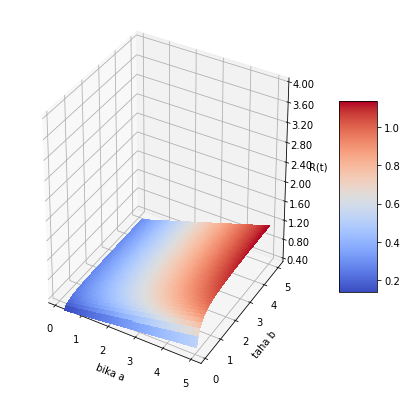

In [40]:
# Variation of R(datyab) with rapport to the prior parameters

datyab = daty_data_mifar

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(0.1,5,100)
Y = np.linspace(0.1,5,100)
X, Y = np.meshgrid(X, Y)
Z = func_sh(datyab)(X)*func_sc(datyab)(Y)
W = X*Y
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#surf = ax.plot_surface(X, Y, W, cmap=cm.coolwarm,
 #                      linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.4, 4)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set(xlabel ='bika a', ylabel = "taha b", zlabel = 'R(t)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.savefig(path_to_save+'Rt225217_anala.eps')

plt.show()

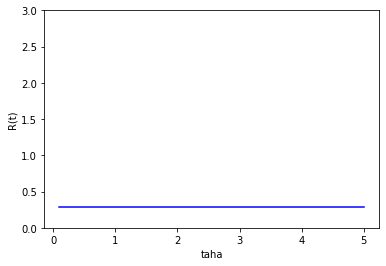

taha* = 1
R(t= 2021-06-19 ) = 0.2858521841647941 = bika*


In [41]:
# R(t) when equality between the prior and the posterior

# 100 linearly spaced numbers
x = np.linspace(0.1,5,100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x, x*funcsh_inv(datyab)(x/func_sc(datyab)(x)), 'blue')

ax.set_ylim(0,3)
ax.set(xlabel ='taha', ylabel = "R(t)")


# show the plot
plt.show()

print('taha* = 1')
print('R(t=',datyab,') =', funcsh_inv(datyab)(1/func_sc(datyab)(1)), '= bika*')


# Fanombanana ny R(t) (estimation of Rt) [7]

## Fomba mifidy a sy b [7]

In [43]:
# Prior Gamma distribution of Rt

Rtpr_sh = 0.28 # shape
Rtpr_sc = 1 # scale

# Posterior distribution for Rt

# Shape parameter :
def Rtps_sh(t):
   return Rtpr_sh + Ireh(t,kk)

# Scale
def Rtps_sc(t):
  return 1/(1/Rtpr_sc + tlsi(t,kk))

# mean
def Rt_salan(t):
  return Rtps_sh(t)*Rtps_sc(t)

# 75th and 25th percentiles

def perc75(t):
  return gengamma.ppf(0.75, Rtps_sh(t), 1, loc = 0, scale = Rtps_sc(t))

def perc25(t):
  return gengamma.ppf(0.25, Rtps_sh(t), 1, loc = 0, scale = Rtps_sc(t))


def Rtps_sal(t):
  return dIvao['Voatomb_7'].loc[format_date(t)]/lsi(t)


daty_oh1 = datetime.date(2021,5,1)

print("Kajy mivantana ny R hoan'ny", daty_data_mifar, ':', Rtps_sal(daty_data_mifar))

print("Salan'isa R hoan'ny", daty_oh1, ':', Rt_salan(daty_oh1))
print("Kartily @ 75% R hoan'ny", daty_oh1, ':', perc75(daty_oh1))
print("Kartily @ 25% R hoan'ny", daty_oh1, ':', perc25(daty_oh1))

print('R(',formatff_date(daty_data_mifar),')', ' = ', np.round(Rt_salan(daty_data_mifar),5), ' (75%-kartily: ', np.round(perc75(daty_data_mifar),5), ' ; 25%-kartily: ', np.round(perc25(daty_data_mifar),5),')', sep = '' )

Kajy mivantana ny R hoan'ny 2021-06-19 : 0.35298086336528406
Salan'isa R hoan'ny 2021-05-01 : 0.3316010599476953
Kartily @ 75% R hoan'ny 2021-05-01 : 0.413132653710849
Kartily @ 25% R hoan'ny 2021-05-01 : 0.2284331048756943
R(19/6/21) = 0.28497 (75%-kartily: 0.38521 ; 25%-kartily: 0.13245)


In [44]:
rt_atsi_lst = []

daty_oh2 = daty_data_mifar
for i in range(12):
  t = daty_oh2 - datetime.timedelta(days = i)
  rt_amboar = Rt_salan(t)
  rt_atsi_lst.append((t,Rt_salan(t)))

rt_atsi_lst

[(datetime.date(2021, 6, 19), 0.2849651265348935),
 (datetime.date(2021, 6, 18), 0.2451038611432511),
 (datetime.date(2021, 6, 17), 0.21175751802172235),
 (datetime.date(2021, 6, 16), 0.1656045175573559),
 (datetime.date(2021, 6, 15), 0.1658209047453661),
 (datetime.date(2021, 6, 14), 0.17739950792039666),
 (datetime.date(2021, 6, 13), 0.24819483914017296),
 (datetime.date(2021, 6, 12), 0.43654967290684615),
 (datetime.date(2021, 6, 11), 0.7687204985166963),
 (datetime.date(2021, 6, 10), 1.2111185520339518),
 (datetime.date(2021, 6, 9), 1.5472708131965025),
 (datetime.date(2021, 6, 8), 1.7780770364415297)]

In [45]:
# Plotting 

np.random.seed(12345)

daty_data_mifar9 = daty_data_mifar - datetime.timedelta(days = 9)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_lst = []

data_Rt_lst = []

for i in range(round(((daty_data_mifar - daty_data_mifar9).days)+1)):
  t = daty_data_mifar9 + datetime.timedelta(days = i)
  data_amboar = [gengamma.rvs( func_sh(t)(Rt_salan(t)), 1, loc = 0, scale = func_sc(t)(1)) for j in range(1000)]
  daty_lst.append(formatf_date(t))
  data_Rt_lst.append(data_amboar)


In [47]:
Rtdata = pd.DataFrame(columns =['daty10','rt10'])
for i in range(10):
    Rtdata.loc[i] = [daty_lst[i],data_Rt_lst[i]]

Rtdata = Rtdata.explode('rt10')
Rtdata['rt10'] = Rtdata['rt10'].astype('float')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


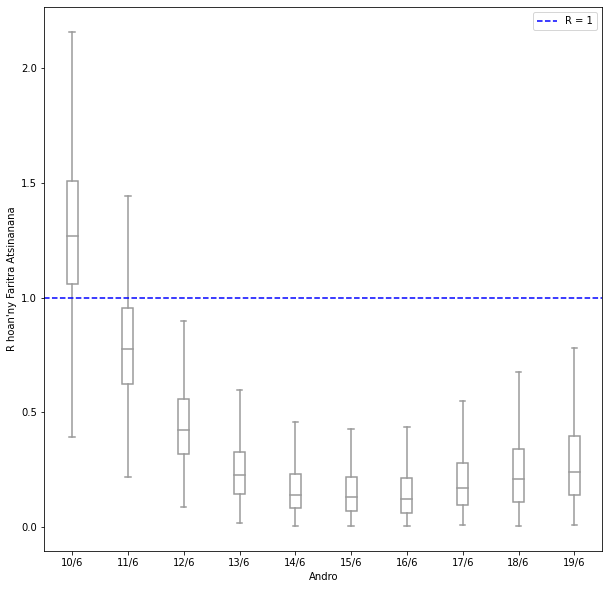

In [48]:
# Plotting the last 10 days

fig, ax = plt.subplots(figsize=(10, 10))


sns.boxplot(x = "daty10", y = "rt10", data = Rtdata, color='white', width=0.2, showfliers=False, ax=ax)
ax.axhline(y=1, color='b', linestyle='dashed', label ="R = 1")

ax.set(xlabel ='Andro', ylabel = "R hoan'ny Faritra Atsinanana")
ax.legend(loc= 'best')

plt.savefig(path_to_save+'Rt19621107_atsi.png')
plt.savefig(path_to_save+'Rt19621107_atsi.eps')
plt.show()

# Jeritodika ny herinandro [7]

In [49]:
daty_ambaj = datetime.date(2021,6,15)
daty_amboj = datetime.date(2021,6,19)

daty_data_mifarj = datetime.date(2021,6,12)

In [50]:
daty_oh1 = daty_ambaj

print('Tombana ambany: R(',formatff_date(daty_oh1),')', ' = \\textbf{', np.round(Rt_salan(daty_oh1),5), '} (75\%-kartily: ', np.round(perc75(daty_oh1),5), ' ; 25\%-kartily: ', np.round(perc25(daty_oh1),5),") raisina hoan'ny ",formatfff_date(daty_data_mifarj + datetime.timedelta(days = 1)),'-',formatff_date(daty_data_mifar), sep = '')

daty_oh2 = daty_amboj

print('Tombana ambony: R(',formatff_date(daty_oh2),')', ' = \\textbf{', np.round(Rt_salan(daty_oh2),5), '} (75\%-kartily: ', np.round(perc75(daty_oh2),5), ' ; 25\%-kartily: ', np.round(perc25(daty_oh2),5),") raisina hoan'ny ",formatfff_date(daty_data_mifarj + datetime.timedelta(days = 1)),'-',formatff_date(daty_data_mifar), sep = '' )

Tombana ambany: R(15/6/21) = \textbf{0.16582} (75\%-kartily: 0.22415 ; 25\%-kartily: 0.07707) raisina hoan'ny 13-19/6/21
Tombana ambony: R(19/6/21) = \textbf{0.28497} (75\%-kartily: 0.38521 ; 25\%-kartily: 0.13245) raisina hoan'ny 13-19/6/21


### Ambany [7]

In [51]:
# Computing Ivao(daty_mifarj + i) for i in range(1,8)

daty_m1j = daty_data_mifarj + datetime.timedelta(days = 1)

#Rt_amba_hitsiny = (Rt_salan(datetime.date(2020,7,20))- Rt_salan(daty_ambaj))/2

Rt_amba_hitsiny = -0.15
Rt_vibaj = Rt_salan(daty_ambaj) + Rt_amba_hitsiny

Iv = int(Rt_vibaj*lsi(daty_m1j))

dIvao.loc[pd.to_datetime(daty_m1j)] =[Iv]

for i in range(1,8):
 tj = daty_m1j + datetime.timedelta(days = i)
 Ivv = int(Rt_vibaj*lsi(tj))
 dIvao.loc[pd.to_datetime(tj)] = [Ivv]

In [ ]:
Rt_vibaj

0.3931323762665614

In [52]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_j_lst = []

data_baj = []


for i in range(1,8):
  t = daty_data_mifarj + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_j_lst.append(daty)
  data_baj.append(data_amboar)


### Ambony [7]

In [ ]:
# Computing Ivao(daty_mifarj + i) for i in range(1,8)

daty_m1j = daty_data_mifarj + datetime.timedelta(days = 1)

#Rt_ambo_hitsiny = (Rt_salan(datetime.date(2020,7,22))- Rt_salan(daty_amboj))/2

Rt_ambo_hitsiny = 0

Rt_viboj = Rt_salan(daty_amboj) + Rt_ambo_hitsiny

Iv = int(Rt_viboj*lsi(daty_m1j))

dIvao.loc[pd.to_datetime(daty_m1j)] =[Iv]

for i in range(1,8):
 tj = daty_m1j + datetime.timedelta(days = i)
 Ivv = int(Rt_viboj*lsi(tj))
 dIvao.loc[pd.to_datetime(tj)] = [Ivv]

In [ ]:
# Sampling 

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_j_lst = []

data_boj = []


for i in range(1,8):
  t = daty_data_mifarj + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_j_lst.append(daty)
  data_boj.append(data_amboar)


In [67]:
Rtdataj = pd.DataFrame(columns =['datyj','rtbaj','rtboj'])
for i in range(7):
    Rtdataj.loc[i] = [daty_j_lst[i],data_baj[i], data_boj[i]]

Rtdataj = Rtdataj.explode('rtbaj')
Rtdataj = Rtdataj.explode('rtboj')
Rtdataj['rtbaj'] = Rtdataj['rtbaj'].astype('float')
Rtdataj['rtboj'] = Rtdataj['rtboj'].astype('float')

### Sary

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


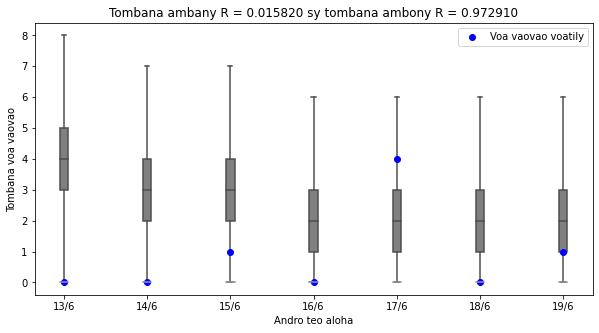

In [68]:
# Plotting the evaluation of the last 7 days

fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x = "datyj", y = 'rtbaj', data = Rtdataj, color='white', width=0.1, showfliers=False, ax=ax)
box = sns.boxplot(x = "datyj", y = 'rtboj', data = Rtdataj, color='grey', width=0.1, showfliers=False, ax=ax)
ax.plot(daty_j_lst, dIvao.loc[pd.to_datetime(daty_m1j):pd.to_datetime(daty_m1j + datetime.timedelta(days = 6))], marker ="o",ls = 'None', color='blue',label="Voa vaovao voatily")
ax.set(xlabel = 'Andro teo aloha', ylabel="Tombana voa vaovao", title = 'Tombana ambany R = %f sy tombana ambony R = %f' % (np.round(Rt_vibaj,5),np.round(Rt_viboj,5)))

plt.legend(loc= 'upper right')

plt.savefig(path_to_save+'Iv136217j_atsi.eps')
plt.savefig(path_to_save+'Iv136217j_atsi.png')

plt.show()

# Ny 7 andro manaraka [7]

In [55]:
# Choice of R(t) for the forecasting

# Dates for which R(t) is minimum and maximum during the last 10 days

daty_amba = daty_ambaj
daty_ambo = daty_amboj

### Vinavina ambany [7]

In [56]:
# Computing Ivao(daty_mifar + i) for i in range(1,8)

daty_m1 = daty_data_mifar + datetime.timedelta(days = 1)

Iv = int(Rt_salan(daty_amba)*lsi(daty_m1))

dIvao.loc[pd.to_datetime(daty_m1)] =[Iv]

for i in range(1,8):
 errt = daty_m1 + datetime.timedelta(days = i)
 Ivv = int(Rt_salan(daty_amba)*lsi(errt))
 dIvao.loc[pd.to_datetime(errt)] =[Ivv]


In [57]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_hoav_lst = []

data_amba_hoav = []

Ivv_dat = []

for i in range(1,8):
  t = daty_data_mifar + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_hoav_lst.append(daty)
  data_amba_hoav.append(data_amboar)

In [58]:
print('Vinavina ambany')

daty_oh = daty_data_mifar + datetime.timedelta(days = 2)

print("notombanana avy amin'ny R(", formatff_date(daty_amba), ') = ', np.round(Rt_salan(daty_amba),5), ". \\\\", sep = '') 


print('Ohatra, R(', formatff_date(daty_oh),') = ', np.round(Rt_salan(daty_oh),5), ". Isan'ny voa vaovao @ ", formatff_date(daty_oh), ' = ',  int(dIvao['Voatomb_7'].loc[format_date(daty_oh)]), ' (75\%-kartily: ', int(poisson.ppf(0.75, dIvao['Voatomb_7'].loc[format_date(daty_oh)])), ' ; 25\%-kartily: ', int(poisson.ppf(0.25, dIvao['Voatomb_7'].loc[format_date(daty_oh)])), ')', sep = '')

Vinavina ambany
notombanana avy amin'ny R(15/6/21) = 0.16582. \\
Ohatra, R(21/6/21) = 0.05686. Isan'ny voa vaovao @ 21/6/21 = 0 (75\%-kartily: 0 ; 25\%-kartily: 0)


### Vinavina ambony [7]

In [60]:
# Computing Ivao(daty_mifar + i) for i in range(1,8)

daty_m1 = daty_data_mifar + datetime.timedelta(days = 1)

Iv = int(Rt_salan(daty_ambo)*lsi(daty_m1))

dIvao.loc[pd.to_datetime(daty_m1)] =[Iv]

for i in range(1,8):
 errt = daty_m1 + datetime.timedelta(days = i)
 Ivv = int(Rt_salan(daty_ambo)*lsi(errt))
 dIvao.loc[pd.to_datetime(errt)] =[Ivv]


In [61]:
# Sampling

np.random.seed(12345)

formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_hoav_lst = []

data_ambo_hoav = []

Ivv_dat = []

for i in range(1,8):
  t = daty_data_mifar + datetime.timedelta(days = i)
  daty = formatf_date(t)
  datyy = format_date(t)
  data_amboar = [ poisson.rvs(dIvao.loc[datyy]) for j in range(600)]
  daty_hoav_lst.append(daty)
  data_ambo_hoav.append(data_amboar)

In [62]:
print('Vinavina ambony')

daty_oh = daty_data_mifar + datetime.timedelta(days = 2)

print("notombanana avy amin'ny R(", formatff_date(daty_ambo), ') = ', np.round(Rt_salan(daty_ambo),5), ". \\\\", sep = '') 


print('Ohatra, R(', formatff_date(daty_oh),') = ', np.round(Rt_salan(daty_oh),5), ". Isan'ny voa vaovao @ ", formatff_date(daty_oh), ' = \\textbf{',  int(dIvao['Voatomb_7'].loc[format_date(daty_oh)]), '} (75\%-kartily: \\textbf{', int(poisson.ppf(0.75, dIvao['Voatomb_7'].loc[format_date(daty_oh)])), '} ; 25\%-kartily: \\textbf{', int(poisson.ppf(0.25, dIvao['Voatomb_7'].loc[format_date(daty_oh)])), '})', sep = '')


Vinavina ambony
notombanana avy amin'ny R(19/6/21) = 0.28497. \\
Ohatra, R(21/6/21) = 0.05686. Isan'ny voa vaovao @ 21/6/21 = \textbf{0} (75\%-kartily: \textbf{0} ; 25\%-kartily: \textbf{0})


In [63]:
Rtdatah = pd.DataFrame(columns =['datyh','rtbah','rtboh'])
for i in range(7):
    Rtdatah.loc[i] = [daty_hoav_lst[i],data_amba_hoav[i], data_ambo_hoav[i]]

Rtdatah = Rtdatah.explode('rtbah')
Rtdatah = Rtdatah.explode('rtboh')
Rtdatah['rtbah'] = Rtdatah['rtbah'].astype('float')
Rtdatah['rtboh'] = Rtdatah['rtboh'].astype('float')

### Sary [7]

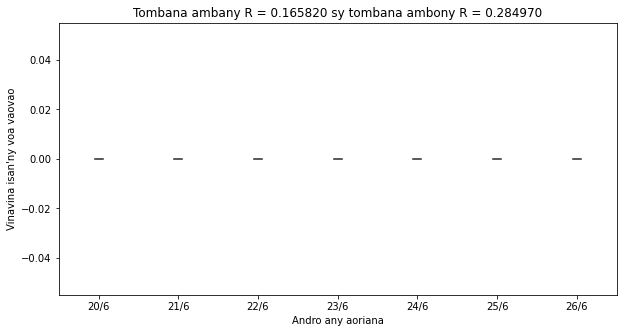

In [64]:
# Plotting boundaries for the next 7 days

fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x = 'datyh', y = 'rtbah', data = Rtdatah, color='white', width=0.1, showfliers=False, ax=ax)
box = sns.boxplot(x = 'datyh', y = 'rtboh', data = Rtdatah, color='grey', width=0.1, showfliers=False, ax=ax)

ax.set_title('Tombana ambany R = %f sy tombana ambony R = %f' % (np.round(Rt_salan(daty_amba),5),np.round(Rt_salan(daty_ambo),5)))
ax.set_xlabel('Andro any aoriana')
ax.set_ylabel("Vinavina isan'ny voa vaovao")

plt.savefig(path_to_save+'Iv106217hoav_atsi.eps')
plt.savefig(path_to_save+'Iv106217hoav_atsi.png')

plt.show()